# Downloading the pretrained models.

In [1]:
! mkdir pretrained_models
! cd pretrained_models && wget "http://vllab1.ucmerced.edu/~yli62/CartoonGAN/pytorch_pth/Hayao_net_G_float.pth"

A subdirectory or file pretrained_models already exists.
'wget' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
! cd pretrained_models && wget "http://vllab1.ucmerced.edu/~yli62/CartoonGAN/pytorch_pth/Hosoda_net_G_float.pth"

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
! cd pretrained_models && wget "http://vllab1.ucmerced.edu/~yli62/CartoonGAN/pytorch_pth/Paprika_net_G_float.pth"

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
! cd pretrained_models && wget "http://vllab1.ucmerced.edu/~yli62/CartoonGAN/pytorch_pth/Shinkai_net_G_float.pth"

'wget' is not recognized as an internal or external command,
operable program or batch file.


# Lets test the models

In [5]:
%config Completer.use_jedi = False

%load_ext autoreload
%autoreload 2

In [6]:
import sys
sys.path.append("../")
from io import BytesIO

## Our transformer model

In [7]:
# networks/Transformer.py

import torch
import torch.nn as nn
import torch.nn.functional as F


class Transformer(nn.Module):
    def __init__(self):
        super(Transformer, self).__init__()
        #
        self.refpad01_1 = nn.ReflectionPad2d(3)
        self.conv01_1 = nn.Conv2d(3, 64, 7)
        self.in01_1 = InstanceNormalization(64)
        # relu
        self.conv02_1 = nn.Conv2d(64, 128, 3, 2, 1)
        self.conv02_2 = nn.Conv2d(128, 128, 3, 1, 1)
        self.in02_1 = InstanceNormalization(128)
        # relu
        self.conv03_1 = nn.Conv2d(128, 256, 3, 2, 1)
        self.conv03_2 = nn.Conv2d(256, 256, 3, 1, 1)
        self.in03_1 = InstanceNormalization(256)
        # relu

        # res block 1
        self.refpad04_1 = nn.ReflectionPad2d(1)
        self.conv04_1 = nn.Conv2d(256, 256, 3)
        self.in04_1 = InstanceNormalization(256)
        # relu
        self.refpad04_2 = nn.ReflectionPad2d(1)
        self.conv04_2 = nn.Conv2d(256, 256, 3)
        self.in04_2 = InstanceNormalization(256)
        # + input

        # res block 2
        self.refpad05_1 = nn.ReflectionPad2d(1)
        self.conv05_1 = nn.Conv2d(256, 256, 3)
        self.in05_1 = InstanceNormalization(256)
        # relu
        self.refpad05_2 = nn.ReflectionPad2d(1)
        self.conv05_2 = nn.Conv2d(256, 256, 3)
        self.in05_2 = InstanceNormalization(256)
        # + input

        # res block 3
        self.refpad06_1 = nn.ReflectionPad2d(1)
        self.conv06_1 = nn.Conv2d(256, 256, 3)
        self.in06_1 = InstanceNormalization(256)
        # relu
        self.refpad06_2 = nn.ReflectionPad2d(1)
        self.conv06_2 = nn.Conv2d(256, 256, 3)
        self.in06_2 = InstanceNormalization(256)
        # + input

        # res block 4
        self.refpad07_1 = nn.ReflectionPad2d(1)
        self.conv07_1 = nn.Conv2d(256, 256, 3)
        self.in07_1 = InstanceNormalization(256)
        # relu
        self.refpad07_2 = nn.ReflectionPad2d(1)
        self.conv07_2 = nn.Conv2d(256, 256, 3)
        self.in07_2 = InstanceNormalization(256)
        # + input

        # res block 5
        self.refpad08_1 = nn.ReflectionPad2d(1)
        self.conv08_1 = nn.Conv2d(256, 256, 3)
        self.in08_1 = InstanceNormalization(256)
        # relu
        self.refpad08_2 = nn.ReflectionPad2d(1)
        self.conv08_2 = nn.Conv2d(256, 256, 3)
        self.in08_2 = InstanceNormalization(256)
        # + input

        # res block 6
        self.refpad09_1 = nn.ReflectionPad2d(1)
        self.conv09_1 = nn.Conv2d(256, 256, 3)
        self.in09_1 = InstanceNormalization(256)
        # relu
        self.refpad09_2 = nn.ReflectionPad2d(1)
        self.conv09_2 = nn.Conv2d(256, 256, 3)
        self.in09_2 = InstanceNormalization(256)
        # + input

        # res block 7
        self.refpad10_1 = nn.ReflectionPad2d(1)
        self.conv10_1 = nn.Conv2d(256, 256, 3)
        self.in10_1 = InstanceNormalization(256)
        # relu
        self.refpad10_2 = nn.ReflectionPad2d(1)
        self.conv10_2 = nn.Conv2d(256, 256, 3)
        self.in10_2 = InstanceNormalization(256)
        # + input

        # res block 8
        self.refpad11_1 = nn.ReflectionPad2d(1)
        self.conv11_1 = nn.Conv2d(256, 256, 3)
        self.in11_1 = InstanceNormalization(256)
        # relu
        self.refpad11_2 = nn.ReflectionPad2d(1)
        self.conv11_2 = nn.Conv2d(256, 256, 3)
        self.in11_2 = InstanceNormalization(256)
        # + input

        ##------------------------------------##
        self.deconv01_1 = nn.ConvTranspose2d(256, 128, 3, 2, 1, 1)
        self.deconv01_2 = nn.Conv2d(128, 128, 3, 1, 1)
        self.in12_1 = InstanceNormalization(128)
        # relu
        self.deconv02_1 = nn.ConvTranspose2d(128, 64, 3, 2, 1, 1)
        self.deconv02_2 = nn.Conv2d(64, 64, 3, 1, 1)
        self.in13_1 = InstanceNormalization(64)
        # relu
        self.refpad12_1 = nn.ReflectionPad2d(3)
        self.deconv03_1 = nn.Conv2d(64, 3, 7)
        # tanh

    def forward(self, x):
        y = F.relu(self.in01_1(self.conv01_1(self.refpad01_1(x))))
        y = F.relu(self.in02_1(self.conv02_2(self.conv02_1(y))))
        t04 = F.relu(self.in03_1(self.conv03_2(self.conv03_1(y))))

        ##
        y = F.relu(self.in04_1(self.conv04_1(self.refpad04_1(t04))))
        t05 = self.in04_2(self.conv04_2(self.refpad04_2(y))) + t04

        y = F.relu(self.in05_1(self.conv05_1(self.refpad05_1(t05))))
        t06 = self.in05_2(self.conv05_2(self.refpad05_2(y))) + t05

        y = F.relu(self.in06_1(self.conv06_1(self.refpad06_1(t06))))
        t07 = self.in06_2(self.conv06_2(self.refpad06_2(y))) + t06

        y = F.relu(self.in07_1(self.conv07_1(self.refpad07_1(t07))))
        t08 = self.in07_2(self.conv07_2(self.refpad07_2(y))) + t07

        y = F.relu(self.in08_1(self.conv08_1(self.refpad08_1(t08))))
        t09 = self.in08_2(self.conv08_2(self.refpad08_2(y))) + t08

        y = F.relu(self.in09_1(self.conv09_1(self.refpad09_1(t09))))
        t10 = self.in09_2(self.conv09_2(self.refpad09_2(y))) + t09

        y = F.relu(self.in10_1(self.conv10_1(self.refpad10_1(t10))))
        t11 = self.in10_2(self.conv10_2(self.refpad10_2(y))) + t10

        y = F.relu(self.in11_1(self.conv11_1(self.refpad11_1(t11))))
        y = self.in11_2(self.conv11_2(self.refpad11_2(y))) + t11
        ##

        y = F.relu(self.in12_1(self.deconv01_2(self.deconv01_1(y))))
        y = F.relu(self.in13_1(self.deconv02_2(self.deconv02_1(y))))
        y = torch.tanh(self.deconv03_1(self.refpad12_1(y)))

        return y


class InstanceNormalization(nn.Module):
    def __init__(self, dim, eps=1e-9):
        super(InstanceNormalization, self).__init__()
        self.scale = nn.Parameter(torch.FloatTensor(dim))
        self.shift = nn.Parameter(torch.FloatTensor(dim))
        self.eps = eps
        self._reset_parameters()

    def _reset_parameters(self):
        self.scale.data.uniform_()
        self.shift.data.zero_()

    def __call__(self, x):
        n = x.size(2) * x.size(3)
        t = x.view(x.size(0), x.size(1), n)
        mean = torch.mean(t, 2).unsqueeze(2).unsqueeze(3).expand_as(x)
        # Calculate the biased var. torch.var returns unbiased var
        var = torch.std(t, 2) ** 2
        var = var.unsqueeze(2).unsqueeze(3).expand_as(x) * (
            (n - 1) / torch.FloatTensor([n])
        )
        scale_broadcast = self.scale.unsqueeze(1).unsqueeze(1).unsqueeze(0)
        scale_broadcast = scale_broadcast.expand_as(x)
        shift_broadcast = self.shift.unsqueeze(1).unsqueeze(1).unsqueeze(0)
        shift_broadcast = shift_broadcast.expand_as(x)
        out = (x - mean) / torch.sqrt(var + self.eps)
        out = out * scale_broadcast + shift_broadcast
        return out

In [8]:
# test_from_code.py

import time
import os

import numpy as np
from PIL import Image

import torch
import torchvision.transforms as transforms
from torch.autograd import Variable

def transform(models, style, input, load_size=450, gpu=-1):
  model = models[style]

  if (gpu > -1):
    model.cuda()
  else:
    model.float()
  
  input_image = Image.open(input).convert("RGB")
  h, w = input_image.size

  ratio = h * 1.0 / w

  if ratio > 1:
    h =  load_size
    w = int(h * 1.0 / ratio)
  else:
    w = load_size
    h = int(w * ratio)
  
  input_image=  input_image.resize((h, w), Image.BICUBIC)
  input_image = np.asarray(input_image)

  input_image = input_image[:,:,[2,1,0]]
  input_image = transforms.ToTensor()(input_image).unsqueeze(0)

  input_image = -1 + 2 * input_image

  if gpu > -1:
    input_image = Variable(input_image).cuda()
  else:
    ipnut_image = Variable(input_image).float()
  
  t0 = time.time()
  print("input shape", input_image.shape)

  with torch.no_grad():
    output_image = model(input_image)[0]
  
  print("inference time took ", {time.time() - t0}," s")

  output_image = output_image[[2,1,0],:,:]
  output_image = output_image.data.cpu().float() * 0.5 + 0.5

  output_image = output_image.numpy()

  output_image = np.uint8(output_image.transpose(1,2,0) * 255)
  output_image = Image.fromarray(output_image)

  return output_image

In [9]:
import base64
import requests
import torch
# import os
# import numpy as np
import argparse
# from PIL import Image
# import torchvision.transforms as transforms
# from torch.autograd import Variable
import torchvision.utils as vutils
# from network.Transformer import Transformer

from tqdm.notebook import tqdm
# from test_from_code import transform

In [10]:
styles = ["Hosoda", "Hayao", "Shinkai", "Paprika"]

models = {}

for style in tqdm(styles):
  model = Transformer()
  model.load_state_dict(torch.load(os.path.join("./pretrained_models", style + '_net_G_float.pth')))
  model.eval()
  models[style] = model

  0%|          | 0/4 [00:00<?, ?it/s]

In [11]:
! wget -O natalie.jpg "https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fstatic.onecms.io%2Fwp-content%2Fuploads%2Fsites%2F44%2F2020%2F10%2F22%2FGettyImages-1206912568-2000.jpg&q=85" 

'wget' is not recognized as an internal or external command,
operable program or batch file.


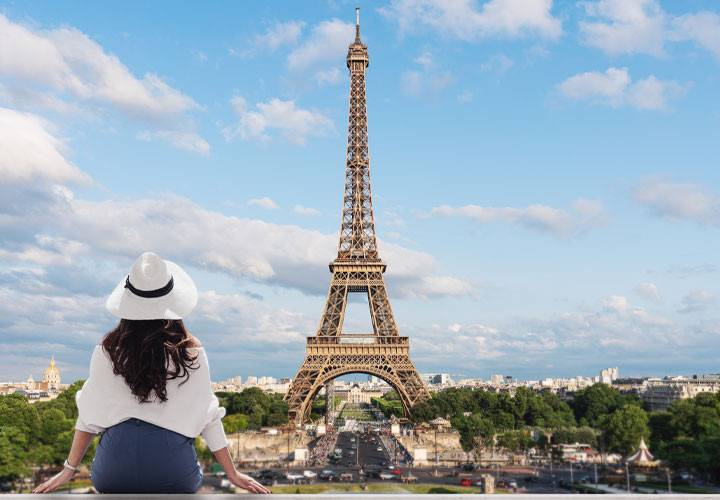

In [12]:
path = "./../../test-images/paris.jpg"

img = Image.open(path)
img

In [13]:
style = "Hosoda"

In [14]:
load_size = 450

In [15]:
%%time
output300 = transform(models, style, path, load_size)

input shape torch.Size([1, 3, 312, 450])
inference time took  {6.9314751625061035}  s
CPU times: total: 18.6 s
Wall time: 7.13 s


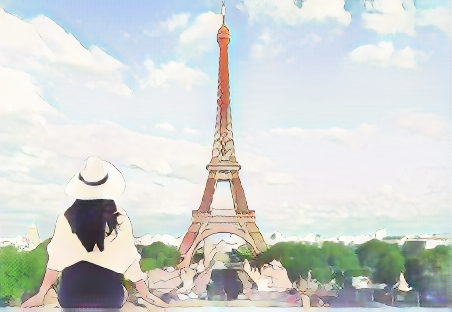

In [16]:
output300